In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.data_preprocessor import get_tourney_data, get_players, get_game_data_as_timeseries
from utils.data_cruncher import get_bid_and_won_stats, get_player_stats
from utils.data_cruncher import get_tri_stats, get_pairwise_stats
from utils.plot_utils import plot_leaderboard_timeseries, plot_performance_timeseries, plot_leaderboard_barplot

### Reading Data

In [2]:
TOURNEY_NUMBER = 1

raw_df = get_tourney_data(TOURNEY_NUMBER, is_mini_championship=True)
game_data = get_game_data_as_timeseries(raw_df)
players = get_players(raw_df)

print(f'## 3 of Spades Championship - {TOURNEY_NUMBER}')
print(f'Players participating in this Championship are : {players}')

# raw_df.head()

## 3 of Spades Championship - 1
Players participating in this Championship are : ['Akash', 'Naati', 'Nats', 'Prateek']


# Part 1 - Crunching player stats

In [3]:
player_stats = get_player_stats(raw_df)

player_stats.to_csv(f'tourney_data/graphs/C{TOURNEY_NUMBER}_player_stats.csv')
# print(player_stats.to_markdown())
player_stats



,Player,Wins,TotalGames,AvgPoints,TotalPoints,WinPercentage
3,Prateek,10,17,120.6,2050,58.8
0,Akash,9,17,114.1,1940,52.9
2,Nats,8,17,98.8,1680,47.1
1,Naati,7,17,77.6,1320,41.2


See themes below
<!-- wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp -->

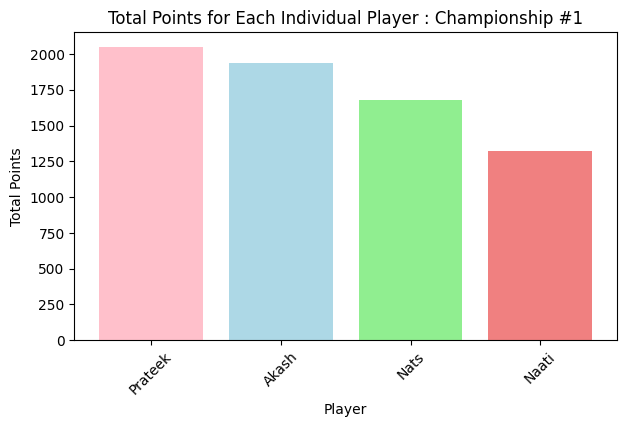

In [4]:
plot_leaderboard_barplot(player_stats, tourney_number=TOURNEY_NUMBER, save_image=True)

# Part 2 - Seeing performance graph over the tournament

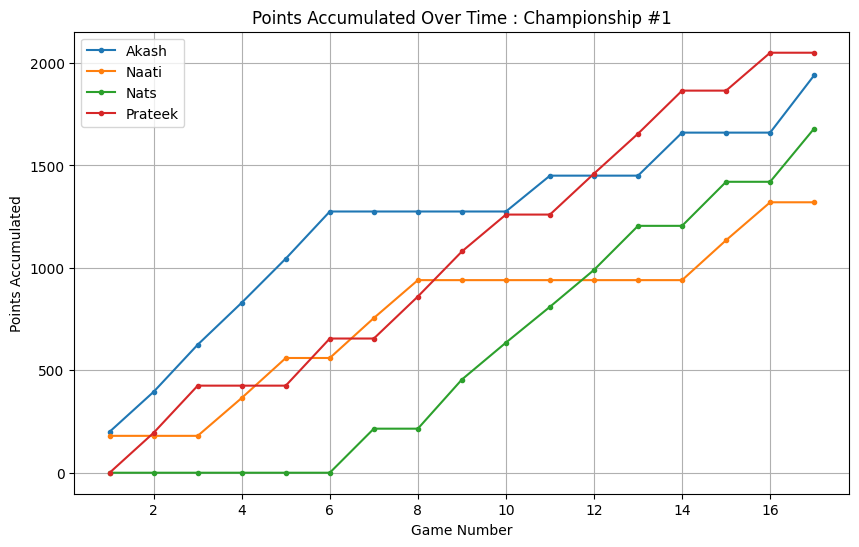

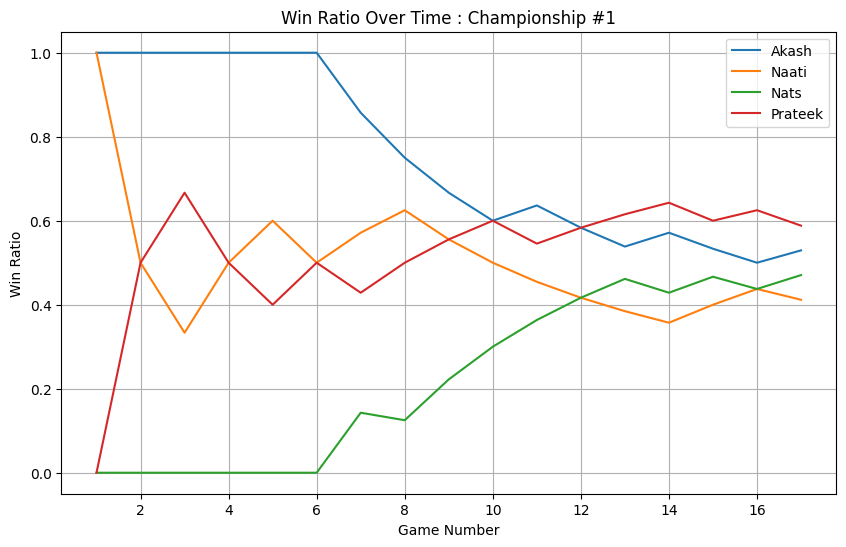

In [5]:
plot_leaderboard_timeseries(game_data, players, tourney_number=TOURNEY_NUMBER, save_image=False)
plot_performance_timeseries(game_data, players, tourney_number=TOURNEY_NUMBER, save_image=False)


# Part 3 - Pair-wise stats

In [6]:
result_pair = get_pairwise_stats(raw_df, min_num_games=10)
result_pair

,Player_x,Player_y,Wins,Losses,TotalGames,AvgPoints,WinPercentage


# Part 4 - Trio stats

In [7]:
result_trio = get_tri_stats(raw_df, min_num_games=5)
result_trio

,Player_x,Player_y,Player_z,Wins,Losses,TotalGames,AvgPoints,WinPercentage


# Part 5 - #games bid and won

In [8]:
get_bid_and_won_stats(raw_df)

,Player,Bid and Won
0,Akash,4
2,Nats,4
3,Prateek,2
1,Naati,0


In [9]:
from utils.ranking_system import UniversalRatingSystem, compute_ranking

universal_rating_system = UniversalRatingSystem()

compute_ranking(raw_df, universal_rating_system)
universal_rating_system.print()

Akash 1001.98
Naati 996.24
Nats 999.46
Prateek 1003.32
